In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
#  simpleFit.py
#  G. Cowan / RHUL Physics / October 2017
#  Simple program to illustrate least-squares fitting with curve_fit

In [3]:
# define fit function
def func(x, *theta):
    theta0, theta1 = theta
    return theta0 + theta1*x

In [4]:
# set data values
x   = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
y   = np.array([2.7, 3.9, 5.5, 5.8, 6.5, 6.3, 7.7, 8.5, 8.7])
sig = np.array([0.3, 0.5, 0.7, 0.6, 0.4, 0.3, 0.7, 0.8, 0.5])

In [5]:
# set default parameter values and do the fit
p0 = np.array([1.0, 1.0])
thetaHat, cov = curve_fit(func, x, y, p0, sig, absolute_sigma=True)

In [6]:
# Retrieve minimized chi-squared, etc.
numPoints = len(x)
numPar = len(p0)
ndof = numPoints - numPar
chisq = sum(((y - func(x, *thetaHat))/sig)**2)
print ("chisq = ", chisq, ",     ndof = ", ndof)

chisq =  8.25153611783541 ,     ndof =  7


In [7]:
# Print fit parameters and covariance matrix
print ("\n", "Fitted parameters and standard deviations:")
sigThetaHat = np.sqrt(np.diag(cov))
for i in range(len(thetaHat)):
    print ("thetaHat[", i, "] = ", thetaHat[i], "  +-  ", sigThetaHat[i])


 Fitted parameters and standard deviations:
thetaHat[ 0 ] =  2.2576981889195182   +-   0.29218909382046193
thetaHat[ 1 ] =  0.7409333605720615   +-   0.05723132195270343


In [8]:
print ("\n", "i, j, cov[i,j], rho[i,j]:")
for i in range(len(thetaHat)):
    for j in range(len(thetaHat)):
        rho = cov[i][j] / (sigThetaHat[i]*sigThetaHat[j])
        print (i, "  ", j, "  ", cov[i][j], "  ", rho)


 i, j, cov[i,j], rho[i,j]:
0    0    0.08537446654762271    1.0
0    1    -0.014376325915897156    -0.8597063424480256
1    0    -0.014376325915897159    -0.8597063424480258
1    1    0.0032754242124539935    0.9999999999999999


<Figure size 432x288 with 0 Axes>

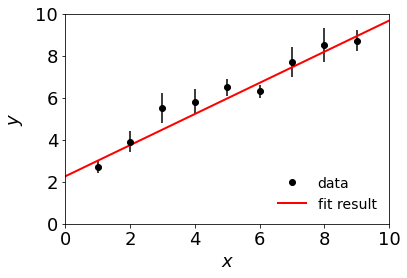

<Figure size 432x288 with 0 Axes>

In [9]:
# Set up plot
matplotlib.rcParams.update({'font.size':18})     # set all font sizes
plt.clf()
fig, ax = plt.subplots(1,1)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
plt.errorbar(x, y, yerr=sig, xerr=0, color='black', fmt='o', label='data')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$', labelpad=10)
xMin = 0
xMax = 10
yMin = 0
yMax = 10
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)
xPlot = np.linspace(xMin, xMax, 100)        # enough points for a smooth curve
fit = func(xPlot, *thetaHat)
plt.plot(xPlot, fit, 'red', linewidth=2, label='fit result')

# Tweak legend
handles, labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
handles = [handles[0][0], handles[1]]      # turn off error bar for data in legend
plt.legend(handles, labels, loc='lower right', fontsize=14, frameon=False)

# Make and store plot
plt.show()
plt.savefig("simpleFit.pdf", format='pdf')